# Heat-Wave 

The goal is:

Based on the current climate scenarious the occurrence of the heat-wave phenomenon should be more frequent in the future in Europe. The main problems connected with Heat-wave events are the overheating of the urban areas, which lowers comfort of living or causes health issues [https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2022EF002682], drought, and water scarcity. Nowadays, there are a lot of studies and methodologies on how we can mitigate the influence of these events. This toolbox wants to answer a simple questions which are more frequently ask by the crisis managemnt local authorities, urban planers or policy makers. These questions are:

- Where we can expect? (places and magnitude)
- How often? (frequency of the occurence)
- How to prevent? (mitigation measures)

This toolbox tries to cover all these problems in five steps:

1. Focusing on the past trends of the Heat occurrence for a better understanding of the rising magnitude of the Heat-connected events.

2. Using the climate scenario for a better understanding of the frequency of heat occurrence in the future on a global (EU) and local scale (cities or interested areas)

3. Focusing on the interested areas, especially on identifying the areas which can be overheated

4. Looking for the reason why this area is overheated and how we can prevent 

5. Exposure and vulnerability of the population in the overheated areas. 

steps (This is only for us...):
1. Look and the trends of the global warming and Heat-Days occurence (https://climate-adapt.eea.europa.eu/en/metadata/indicators/high-utci-days), 
2. Look at the climate scenarious for the future Heat-wave occurence (Euro-Cordex, Chelsa)
3. Identified the areas which are more susceptible to overheating, from the measured data (Landsat8 LST, local sensors)
4. Identified areas suitable for the green measures HW mitigation (Sentinel, NDVI...)
5. Add the population data (next steps), look at the most overheated areas... [Benedeta, CRAHI]

Data:
- CDS EURO-CORDEX climatic data for 2m air temperature 2026-2041 ... 2100? and instrumental preiod 2016-2020 (11km spatial; 1day temporal) ### CDS API ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cordex-domains-single-levels?tab=form
####
- CDS EURO-CORDEX Heat-wave projections rcp 4.5 rcp 8.5 (11km) ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-heat-and-cold-spells?tab=form
####
- CDS Climate variables for cities (only for bigger EU cities, NOT for whole EU) (100m) in Europe from 2008 to 2017 ### https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-urban-climate-cities?tab=overview
####
- SENTINEL2 data for Vegetation characteristics (10-20m spatial; 5-10 days temporal) (NDVI, NDWI, LAI, NDDI, NDBI) ### https://dataspace.copernicus.eu/browser/?zoom=3&lat=26&lng=0&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30
####
- LANDSAT8 land surface temperature for the 2016-2020 (15-30m spatial; 8-16 days tremporal) ### https://rslab.gr/Landsat_LST.html
####
- CHELSA climatic data downscaled from CMIP6 (1km spatial; monthly values, daily values are not available) ### https://envicloud.wsl.ch/#/?prefix=chelsa%2Fchelsa_V2%2FGLOBAL%2F ### https://chelsa-climate.org/
####

Process:
1. EURO-CORDEX (11km) data for the Heat-wave events. The data from Euro-Corex are already precalculated for specific cities in EU.
####
2. CHELSA (1km) data for the Heat-Wave events extraction. We currently testing the CHELSA daily data. 
####
3. LANDSAT8 (30m) for the identification of the overheated areas.The resolution of the 30 meters is suitable for the heat islands idetification, even in the small cities. 
####
4. SENTINEL2 (10m) for the computation of the Vegetation characteristics, find places suitable for the green measures NDVI, NDWI,
NDDI, NDBI. with the Sentinel2 images with the 10m resolution we can identified non-vegetated places, or places with vegetation negatively affected with drought.  
####
5. CRITICAL INFRASTRUCTURE and POPULATION data for the pilot. We can look if the most overheated area overlay the the most poluted areas, we can also look at the shortest distance between overheated areas and the hospitals or free sources of drinking water.


Githhub:
#### https://github.com/CLIMAAX/HEATWAVES


# Import packages

If there be some problems with the instalation of the packages, please let me know. I experience difficulties with the cartopy package. 

In [2]:
import zipfile        # working with the zip folders #
import os             # handling the current working directory
import rasterio       # netcdf and raster processing  #
from pathlib import Path # file system paths
import rioxarray as rxr # netcdf and raster processing
import cdsapi         # API downloading
import numpy as np    # 2-3D array data handling
import pandas as pd   # data handling #
import xarray as xr   # 2-3D array data handling 
from osgeo import gdal # Geo data handling 
import cartopy.crs as ccrs # netcdf data projection 
import cartopy.feature as cf # netcdf data projection 
import cartopy.crs as ccrs # netcdf data projection 
import matplotlib as mpl  #  data plot #
import matplotlib.pyplot as plt #  data plot #
from rasterio.crs import CRS  #  raster dat handling 
from pylab import pcolormesh,show,colorbar,plot,title,legend,subplot,savefig
from xrspatial.classify import reclassify
from matplotlib import pyplot
from rasterio.plot import show
from glob import glob
import geopandas as gpd
import rasterio as rio

# Create a directory structure

In [3]:
workflow_folder = 'Heat_workflow'
if not os.path.exists(workflow_folder):
    os.makedirs(workflow_folder)
    os.makedirs(os.path.join(workflow_folder, 'data'))
    os.makedirs(os.path.join(workflow_folder, 'results'))

# 1. Trends of the Heat-Days occurence in the past

On the website Climate-adapt we can find the tredns of the occurence of the days with Extreme heat. The content in the European Climate Data Explorer pages is delivered by the Copernicus Climate Change Service (C3S) implemented by ECMWF. 

https://climate-adapt.eea.europa.eu/en/metadata/indicators/high-utci-days

- Maybe we can put the trends also here?

# 2. Trends of the Heat-Days occurence in the future

Downloading of the Euro-Cordex data for max, min and mean air temperature (API).
- Download of the data for the past period 2016-2020 (instrumental period)
- Download of the data for the projections 2021-2100 (one netcdf file cover the 5 year period e.g. 2016-2020)
- We can compare the instrumental period to projections.

Manual for the use of the CDS API: https://cds.climate.copernicus.eu/api-how-to

In [4]:
data_dir = os.path.join(workflow_folder,'data')
results_dir = os.path.join(workflow_folder,'results')

For the downloading of the data you need to login to Copernicus Climate Data Store, where you will find yours KEY for data downloading. 

In [5]:
# Change KEY!!!
URL = "https://cds.climate.copernicus.eu/api/v2"
KEY = "Change KEY!!!"
c = cdsapi.Client(url=URL, key=KEY)


DATADIR = data_dir
data = c.retrieve(
    "projections-cordex-domains-single-levels",
    {
           "domain": "europe",
           "experiment": "rcp_8_5",
           "horizontal_resolution": "0_11_degree_x_0_11_degree",
           "temporal_resolution": "daily_mean",
           "variable": [
               "2m_air_temperature", "maximum_2m_temperature_in_the_last_24_hours", "minimum_2m_temperature_in_the_last_24_hours",
           ],
           "gcm_model": "cnrm_cerfacs_cm5",
           "rcm_model": "clmcom_clm_cclm4_8_17",
           "ensemble_member": "r1i1p1",
            "start_year": [
                "2023", "2024", "2025","2026", "2027", "2028", "2029", "2030", "2031", "2032", "2033", "2034", "2035",
                "2026", "2027", "2028","2029", "2030", "2031", "2032", "2033", "2034", "2035", "2036", "2037", "2038",
                "2039", "2040",
            ],
            "end_year": [
                "2023", "2024", "2025","2026", "2027", "2028", "2029", "2030", "2031", "2032", "2033", "2034", "2035",
                "2026", "2027", "2028","2029", "2030", "2031", "2032", "2033", "2034", "2035", "2036", "2037", "2038",
                "2039", "2040",
            ],
           "format": "zip",
    },
   f"{DATADIR}/era5_daily_t2m_eurminmax_2040.zip")

2023-10-16 13:33:06,705 INFO Welcome to the CDS
2023-10-16 13:33:06,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cordex-domains-single-levels
2023-10-16 13:33:06,906 INFO Request is queued
2023-10-16 13:33:07,982 INFO Request is running
2023-10-16 13:41:26,977 INFO Request is completed
2023-10-16 13:41:26,988 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-projections-cordex-domains-single-levels-31cd50bb-8a9f-467c-bed6-313439fc542a.zip to Heat_workflow\dataera5_daily_t2m_eurminmax_2040.zip (5.8G)
2023-10-16 14:22:38,079 INFO Download rate 2.4M/s                                                                      


### Load of the Euro-Cordex daily mean and maximum data projections

Downloaded data are in the 5 year step. For the load of the data we need to select the directory and then start computing:
1. Load the data, downloaded data are for period 2021-2040, they are divided to 4 groups by 5 years. You can merge it or work with five years periods.
2. Convert the unit from K to C 
3. Calculate the monthly means values, you can also download precalculated data but you can calculate it easily without downloading
4. Set CRS to rotated pole. If you want to export map an use it in GIS software, you need to set the coordinated system.
5. Plot of the data. You can select the month and area which you want to plot. 

Euro-Cordex daily mean data 2026-2030:

Text(0.5, 1.0, 'T monthly mean projection for specific month [january]')

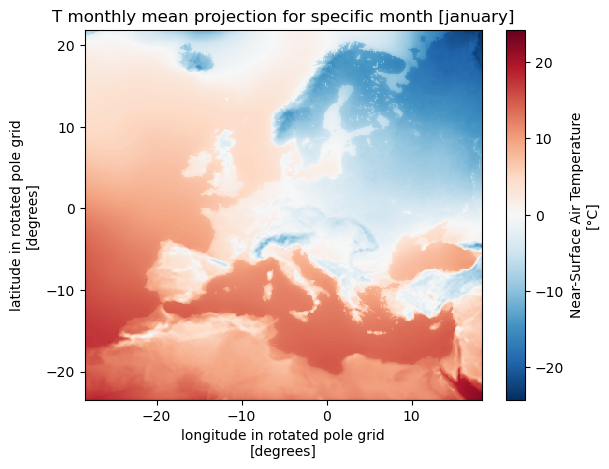

In [15]:
# 1. Data are for 5 year periods, you can select one which you prefer or merge all in one...
tm = f'{data_dir}/era5_daily_t2m_eurminmax_2040/tas_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20260101-20301231.nc'
dm=xr.open_dataset(tm)
dm=xr.decode_cf(dm,decode_coords="all") ### Controls which variables are set as coordinate variables.

# 2. Convert from K to °C
da_m=dm['tas']
tas=da_m -273.15
tas=tas.assign_attrs(da_m.attrs)
tas.attrs['units']='°C'

# 3. Calculate the monthly means values
monthly_mean_projection = tas.groupby('time.month').mean(keep_attrs=True)

# 4. Setting of the Coordinated system
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
monthly_mean_projection.rio.write_crs(rotated_pole, inplace=True)

# 5. Plot data for specific month and area
# You can select the month (0=January, ...., 11=December): 
# monthly_mean[0,:,:].plot()
# You can select the area:
# Area = monthly_mean.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,) # example for Zilina
monthly_mean_projection[0,:,:].plot()
plt.title('T monthly mean projection for specific month [january]') 

Euro-Cordex daily maximum data 2026-2030:

Text(0.5, 1.0, 'T monthly mean projection for specific month')

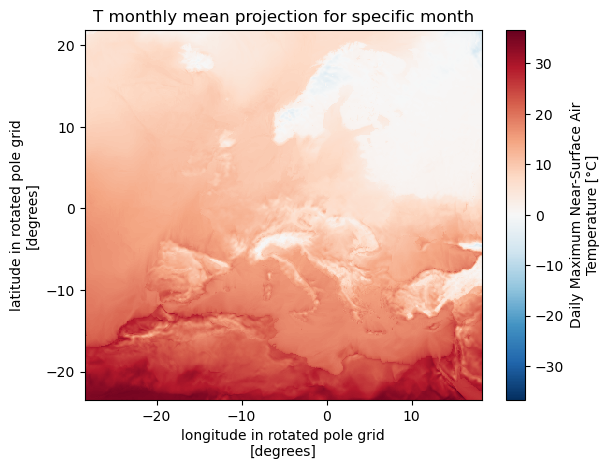

In [17]:
# 1. Data are for 5 year periods, you can select one which you prefer or merge all in one... 
tmax = f'{data_dir}/era5_daily_t2m_eurminmax_2040/tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20260101-20301231.nc'
dmax=xr.open_dataset(tmax)
dmax=xr.decode_cf(dmax,decode_coords="all") ### Controls which variables are set as coordinate variables.
# 2. Convert from K to °C
dmax=dmax['tasmax']
tasmax=dmax - 273.15
tasmax=tasmax.assign_attrs(dmax.attrs)
tasmax.attrs['units']='°C'
# 3. Calculate the monthly means values
monthly_max_projection = tasmax.groupby('time.month').max(keep_attrs=True)

# 4. Setting of the Coordinated system
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
monthly_max_projection.rio.write_crs(rotated_pole, inplace=True)

# 5. Plot data for specific month and area
# You can select the month (0=January, ...., 11=December): 
# monthly_mean[0,:,:].plot()
# You can select the area:
# Area = monthly_mean.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,) # example for Zilina
monthly_max_projection[0,:,:].plot()
plt.title('T monthly mean projection for specific month')

### Load of the Euro-Cordex daily mean and maximum data for historical period

- We download the data for the historical period for the comparison of the mean monthly temperature change with the future projected data.
- We use the same steps as for projections.

Euro-Cordex daily mean data 2016-2020:

Text(0.5, 1.0, 'T monthly mean 2016-2020 for specific month')

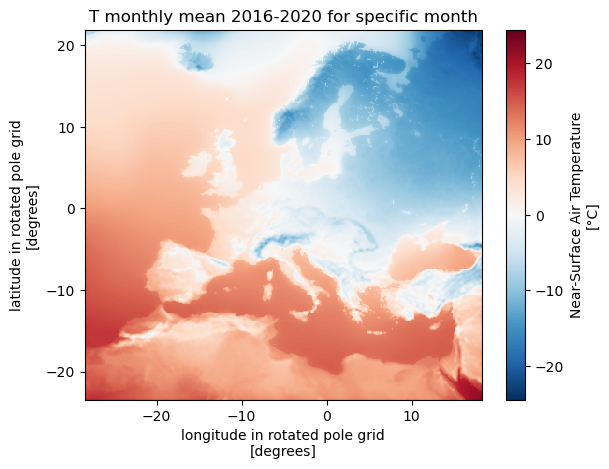

In [8]:
# 1.Data are for 5 year periods, you can select one which you prefer or merge all in one...
tmh = f'{data_dir}/Data_rcp85_daily_t2m_eurminmax_2016/tas_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20160101-20201231.nc'
dmh=xr.open_dataset(tmh)
dmh=xr.decode_cf(dmh,decode_coords="all") ### Controls which variables are set as coordinate variables.

# 2.Convert the K to Celsius
da_mh=dmh['tas']
tash=da_mh -273.15
tash=tash.assign_attrs(da_mh.attrs)
tash.attrs['units']='°C'

# 3.Calculate the montlhy mean
monthly_mean_historical = tash.groupby('time.month').mean(keep_attrs=True)

# 4.Setting of the Coordinated system
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
monthly_mean_historical.rio.write_crs(rotated_pole, inplace=True)

# 5.Plot data for specific month and area
# You can select the month (0=January, ...., 11=December): 
# monthly_mean_historical[0,:,:].plot()
# You can select the area:
# Area = monthly_mean_historical.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,) # example for Zilina
monthly_mean_historical[0,:,:].plot()
plt.title('T monthly mean 2016-2020 for specific month') 

Euro-Cordex daily maximum data 2016-2020:

Text(0.5, 1.0, 'T monthly mean 2016-2020 for specific month')

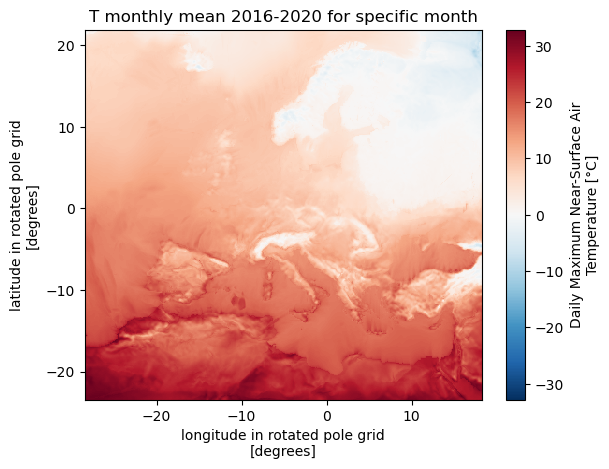

In [11]:
# 1.Data are for 5 year periods, you can select one which you prefer or merge all in one...
tmh_max = f'{data_dir}/Data_rcp85_daily_t2m_eurminmax_2016/tasmax_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_day_20160101-20201231.nc'
dmh_max=xr.open_dataset(tmh_max)
dmh_max=xr.decode_cf(dmh_max,decode_coords="all") ### Controls which variables are set as coordinate variables.

# 2. Convert the K to Celsius
da_mh_max=dmh_max['tasmax']
tash_max=da_mh_max -273.15
tash_max=tash_max.assign_attrs(da_mh_max.attrs)
tash_max.attrs['units']='°C'

# 3. Calculate the montlhy mean
monthly_max_historical= tash_max.groupby('time.month').max(keep_attrs=True)

# 4. Setting of the Coordinated system
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)
monthly_max_historical.rio.write_crs(rotated_pole, inplace=True)

# 5. Plot data for specific month and area
# You can select the month (0=January, ...., 11=December): 
# monthly_max_historical[0,:,:].plot()
# You can select the area:
# Area = monthly_max_historical.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,) # example for Zilina
monthly_max_historical[0,:,:].plot()
plt.title('T monthly mean 2016-2020 for specific month') 

#### Difference between projections and historical data

- We want to also see the difference between Euro-Cordex projections and historical data
- The next plot showing the total difference between projection and historical temperature, for 5 year periods for mean monthly and max monthly temperature for selectet months.

In [19]:
# mean monthly difference projections - historical
mmd=monthly_mean_projection-monthly_mean_historical
mmaxd=monthly_max_projection-monthly_max_historical

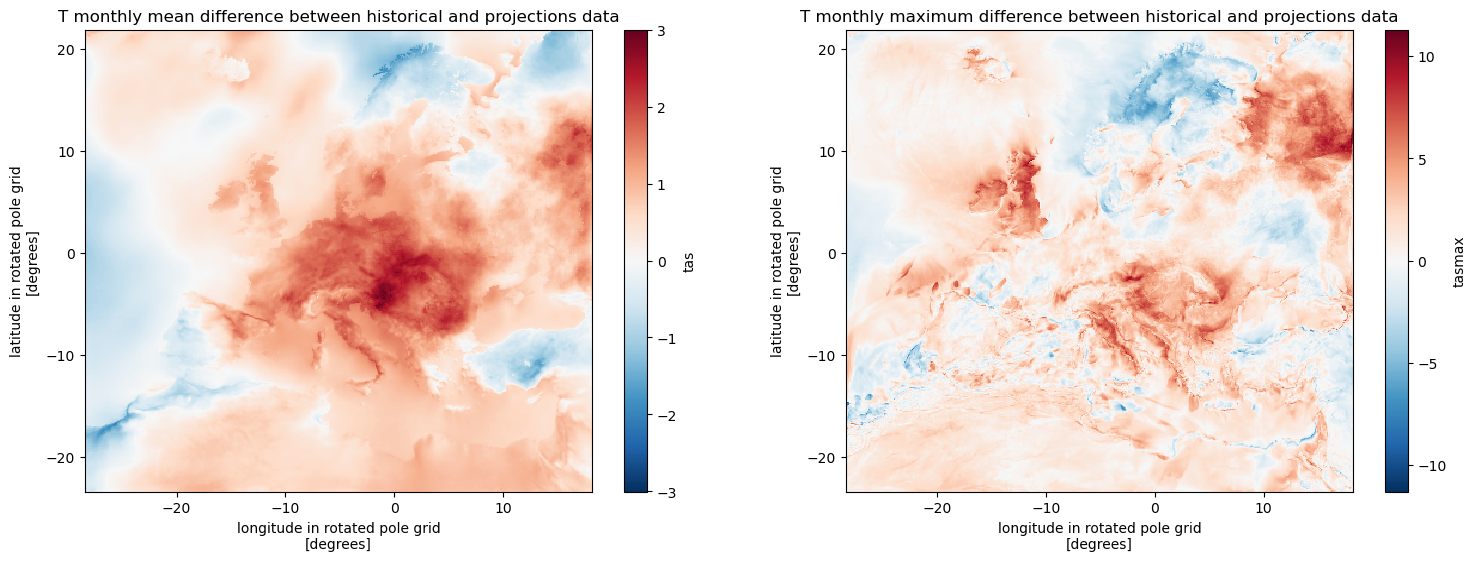

In [23]:
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
mmd[6,:,:].plot(ax=axes[0],)
axes[0].set_title('T monthly mean difference between historical and projections data')
mmaxd[6,:,:].plot(ax=axes[1],)
axes[1].set_title('T monthly maximum difference between historical and projections data')
plt.draw()

### Euro-Cordex T max for Heat-Wave   

For The heat-wave we use the EURO-CORDEX and CHELSA daily maximum temperature data. We used the methodology from the PESETA IV project https://joint-research-centre.ec.europa.eu/peseta-projects/jrc-peseta-iv_en

The HWMId is defined as the maximum magnitude of heat waves in a year. Specifically, a heat wave is defined as a period ≥ 3 consecutive days with maximum temperature above a daily threshold calculated for a 30-year-long reference period (for the purpose of testing we choose shorter period). At least 30-year time series of daily vales are needed to obtain a robust estimation of the indicator. The threshold is defined as the 90th percentile of daily maxima temperature, centred on a 31-day window.

1. We divide the data to months for the period which we have a data 2026-2030
2. Setting of the CRS
3. Clip data to interested area
4. Calculate the treshold of the 90 percentile
5. Calculate the sum of the day which exceeding the treshold for each month. 
6. Plot the maps of the sum of the day which exceeding the treshold for summer months. 
7. HEAT-WAVE identification for the each month (number of heat-wave events for each month)
8. HEAT-WAVE events plot


#### 1. Didive data to the months  

In [14]:
# Use .groupby('time.month') to organize the data into months
# then use .groups to extract the indices for each month
tasmax_month=tasmax.groupby('time.month').groups

# Extract the time indices corresponding to all Junes, Julys, and Augusts  
jun_idxs=tasmax_month[6]
jul_idxs=tasmax_month[7]
aug_idxs=tasmax_month[8]

# Extract the january months by selecting 
# the relevant indices
jun_max=tasmax.isel(time=jun_idxs)
jul_max=tasmax.isel(time=jul_idxs)
aug_max=tasmax.isel(time=aug_idxs)

#### 2. Setting of the CRS 

In [17]:
rotated_pole = ccrs.RotatedPole(pole_latitude=39.25, pole_longitude=-162)

Write the CRS to the data

In [18]:
jun_max.rio.write_crs(rotated_pole, inplace=True)
jul_max.rio.write_crs(rotated_pole, inplace=True)
aug_max.rio.write_crs(rotated_pole, inplace=True)

<xarray.DataArray 'tasmax' (time: 155, rlat: 412, rlon: 424)>
array([[[48.18643  , 48.05075  , 48.03769  , ..., 35.32025  ,
         35.278534 , 35.263336 ],
        [48.066193 , 47.95685  , 47.971954 , ..., 35.213806 ,
         35.13611  , 35.106293 ],
        [47.949097 , 47.869537 , 47.92221  , ..., 35.12033  ,
         34.997833 , 34.965942 ],
        ...,
        [12.863678 , 11.448212 , 12.296326 , ..., 13.934418 ,
         15.418091 , 17.645386 ],
        [12.264343 , 11.533539 , 12.78421  , ..., 14.059662 ,
         14.841492 , 17.227509 ],
        [12.069214 , 12.604858 , 13.179169 , ..., 14.95639  ,
         14.901154 , 16.651367 ]],

       [[47.032013 , 47.18628  , 47.316223 , ..., 34.120605 ,
         34.05725  , 34.02133  ],
        [47.161102 , 47.371613 , 47.445526 , ..., 33.701294 ,
         33.56842  , 33.686493 ],
        [47.69098  , 47.76416  , 47.537476 , ..., 33.328705 ,
         33.43924  , 33.611267 ],
...
        [11.510132 , 11.686707 , 12.7786255, ..., 12.672546 ,
         14.018188 , 15.943329 ],
        [10.725098 , 11.945831 , 13.274078 , ..., 12.721588 ,
         13.393066 , 15.452026 ],
        [10.505035 , 12.311951 , 13.511536 , ..., 13.843689 ,
         13.56311  , 14.804047 ]],

       [[45.18625  , 45.21631  , 45.08377  , ..., 32.68918  ,
         32.745422 , 32.78473  ],
        [44.827362 , 44.92984  , 45.10675  , ..., 32.529022 ,
         32.57422  , 32.57837  ],
        [43.906647 , 43.76419  , 44.51367  , ..., 32.45981  ,
         32.46399  , 32.46335  ],
        ...,
        [10.534973 , 10.486816 , 11.407501 , ..., 11.216614 ,
         12.419464 , 14.687378 ],
        [10.269745 , 10.783813 , 11.790253 , ..., 11.354584 ,
         11.853149 , 14.136322 ],
        [10.061127 , 11.120026 , 12.3003845, ..., 12.864044 ,
         12.644226 , 13.824768 ]]], dtype=float32)
Coordinates:
  * time                        (time) datetime64[ns] 2026-08-01T12:00:00 ......
  * rlat                        (rlat) float64 -23.38 -23.26 ... 21.73 21.83
  * rlon                        (rlon) float64 -28.38 -28.26 ... 18.05 18.16
    rotated_latitude_longitude  int32 ...
    lat                         (rlat, rlon) float32 ...
    lon                         (rlat, rlon) float32 ...
    height                      float64 ...
    spatial_ref                 int32 0
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    comment:           daily-maximum near-surface (usually, 2 meter) air temp...
    units:             °C
    cell_methods:      time: maximum
    history:           2014-03-26T13:11:29Z altered by CMOR: Treated scalar d...
    associated_files:  gridspecFile: gridspec_atmos_fx_CLMcom-CCLM4-8-17_rcp8...

#### 3. Clip data to pilot site

- you can clip the data to your area by changing the clip_box (minx=...., miny=...., maxx=...., maxy=....,)

In [19]:
# Clip data to Zilina for specific month, you can select your own clip_box
jun_maxZA = jun_max.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)
jul_maxZA = jul_max.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)
aug_maxZA = aug_max.rio.clip_box(minx=0.3, miny=-1.7, maxx=0.7, maxy=-1.2,)

#### 4.  For the Heat-wave identification we used the 90 percentile

In [20]:
# 90 quantile for ZA for specific month
junq90_maxZA=jun_maxZA.quantile(0.9,dim=None, method='linear', keep_attrs=None, skipna=None, interpolation=None)
julq90_maxZA=jul_maxZA.quantile(0.9,dim=None, method='linear', keep_attrs=None, skipna=None, interpolation=None)
augq90_maxZA=aug_maxZA.quantile(0.9,dim=None, method='linear', keep_attrs=None, skipna=None, interpolation=None)

In [21]:
# 90 condition for ZA
heatjunZA=xr.where(jun_maxZA>junq90_maxZA, 1, 0)
heatjulZA=xr.where(jul_maxZA>julq90_maxZA, 1, 0)
heataugZA=xr.where(aug_maxZA>augq90_maxZA, 1, 0)

#### 5. Heat-wave days number for summer months (June, July, August)

Sum of the days which exceed 90 percentile in interested area 2026-2040, for specific month (heatjunZA - heataugZA)

In [22]:
# you can select he month (heatjulZA)
HWdjun=np.sum(heatjunZA,axis = 0)
HWdjul=np.sum(heatjulZA,axis = 0)
HWdaug=np.sum(heataugZA,axis = 0)

#### 6. Plot

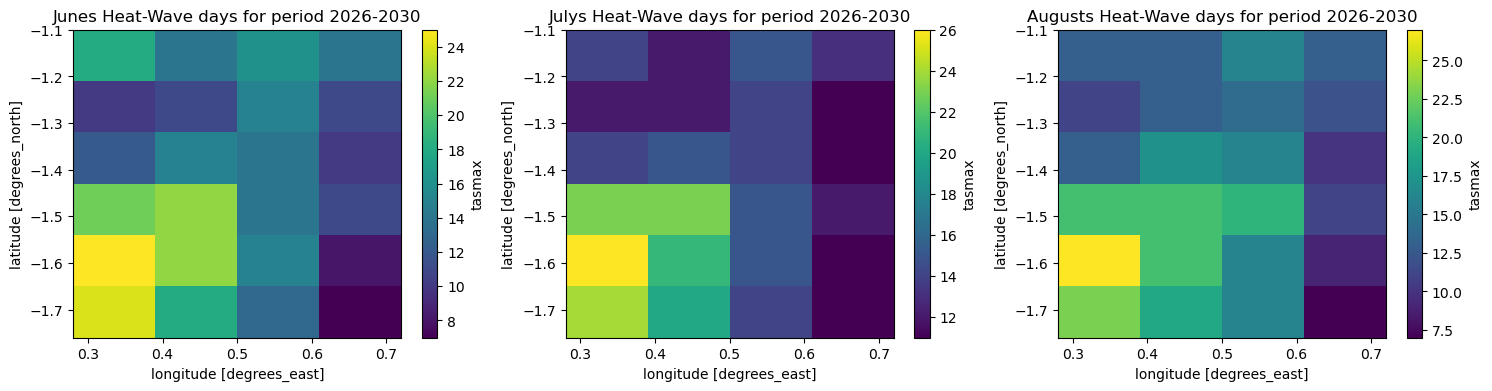

In [23]:
# Plot  Landsat
fig, axes=plt.subplots(ncols=3, figsize=(18,4))
HWdjun.plot(ax=axes[0])
axes[0].set_title('Junes Heat-Wave days for period 2026-2030')
HWdjul.plot(ax=axes[1])
axes[1].set_title('Julys Heat-Wave days for period 2026-2030')
HWdaug.plot(ax=axes[2])
axes[2].set_title('Augusts Heat-Wave days for period 2026-2030')
plt.draw()

### 7. Heat-wave events number in pilot site (Zilina) for specific month

We duplicate the original dataset and move it for 3 days + 1 extra day for the correction. 
1. Copy of the orifinal data ale shift in the time for 3 consecutive days
2. Sum of the Heat-Wave events and plot
3. Write of the CRS and Save

In [25]:
# we select jul 
# Create + time dataset
v=heatjulZA
v1=heatjulZA[:-1,:,:]
v2=heatjulZA[:-2,:,:]
v3=heatjulZA[:-3,:,:]
# Create missing days
t1=heatjulZA[0:1,:,:]
t2=heatjulZA[0:2,:,:]
t3=heatjulZA[0:3,:,:]
# Concatenate missing dates to + time dataset
vi1=xr.concat([t1, v1], dim='time')
vi2=xr.concat([t2, v2], dim='time')
vi3=xr.concat([t3, v3], dim='time')
# Change the time dimesion for correct one
ti=heatjulZA["time"]
# add a time dimension
vi1["time"]=ti
vi2["time"]=ti
vi3["time"]=ti

In [28]:
# Sum of the Heat-Wave
sumv=xr.where((v==1)&(vi1==1)&(vi2==1), 1, 0) # count 3 day HW
sumv2=xr.where((v==1)&(vi1==1)&(vi2==1)&(vi3==1), -1, 0) # delete 4 and more day, it is need to be done because we need to countthe HW as 1
HW1=sumv.sum(dim='time')
HW2=sumv2.sum(dim='time')
HW=HW1+HW2
#pcolormesh(HWa);colorbar();title('Heat-Waves events Zilna');show() # let us view the map...

#### 8. Heat-Wave events plot for specific month

Text(0.5, 1.0, 'Number of Heat-wave events in Zilina July 2026-2030')

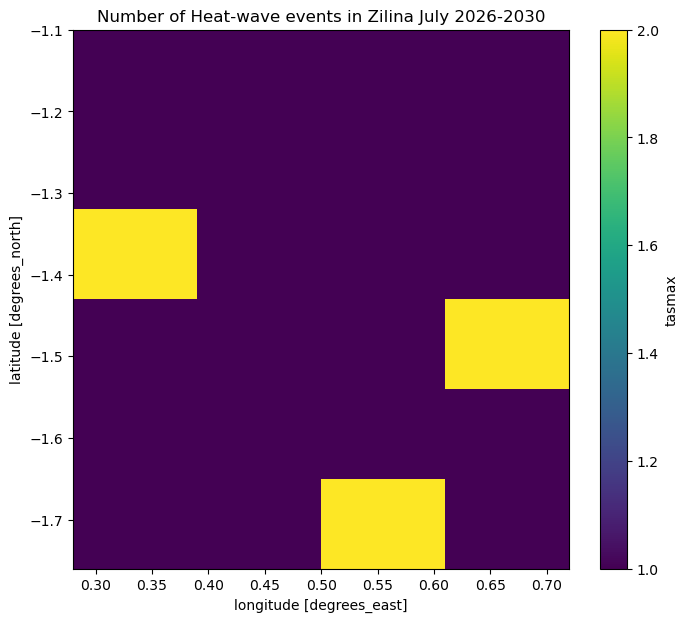

In [29]:
fig, ax=plt.subplots(figsize=(8,7))
HW.plot(ax=ax)
ax.set_title('Number of Heat-wave events in Zilina July 2026-2030')

### Heat-Waves packages thermofeel, xclim, hotspell  



These are another packages which can be used for the detections of the heat wave events 
Thermofeel, xclim, hotspell are the packages which should be suitable for the extraction of the heat-wave events.  https://pypi.org/project/thermofeel/
## https://pypi.org/project/thermofeel/ 
## https://xclim.readthedocs.io/en/stable/indices.html  
## https://hotspell.readthedocs.io/en/latest/  

# 3 - 4 . Historical data for the Heat islands identification

The resolution of the Euro-Cordex data (0.1 deg) is too coarse for the Cities, especially small cities. 
We need to agree on the way that we choose for downscaling:
- based on the elevation?
- based on the land use?
- based on the vegetation and drought characteristics?
- Or we will use the projections only for the frequency of the occuernce not for the specification of the heat islands.

#### Heat islands

Heat islands are urbanized areas that experience higher temperatures than outlying areas. Structures such as buildings, roads, and other infrastructure absorb and re-emit the sun’s heat more than natural landscapes such as forests and water bodies. Urban areas, where these structures are highly concentrated and greenery is limited, become “islands” of higher temperatures relative to outlying areas. [https://www.epa.gov/heatislands]
For the identification of the heat islands from the historical data we can use these data:

Data, needs to be manually downloaded from provided websites, it requires registration and manual choosing of your area and time period (except Euro-Cordex):

#### Historical data from satelite sensors:

- Landsat8 land surface temperature (LST) for the 2016-2020 (15-30m spatial; 8-16 days tremporal). For the identification of the heat island we can use this product, which provide the data about calculated land surface temperature from the Landsat8 imagery. The LST product is available on the RSLAB website, or can be calculated from the L8 imagery bands.
Download: https://rslab.gr/downloads_LandsatLST.html ### https://rslab.gr/Landsat_LST.html (only for 2015-2021) ## recalculation of the LST from Landsat8 imagery https://earth.esa.int/eogateway/catalog/landsat-8-collection-2-european-coverage

- Sentinel2 data for Vegetation characteristics (10-20m spatial; 5-10 days temporal) (NDVI, NDWI, LAI, NDDI, NDBI). The Sentinel 2. data with the resolution of the 10m are suitable also for the small cities to identified the green areas, and condition of the vegetation. The green (conected with vegetation) and blue (conected with water) are best mitigation measures against the overheating of the city areas (see the GeoIkp platform: https://geoikp.operandum-project.eu/data/map).  Download: https://dataspace.copernicus.eu/browser/?zoom=3&lat=26&lng=0&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30

#### Historical data from climatic models:

- CHELSA climatic data downscaled from era-5 (1km spatial; monthly values, daily values are not available) ### https://envicloud.wsl.ch/#/?prefix=chelsa%2Fchelsa_V2%2FGLOBAL%2F 
Download: https://chelsa-climate.org/

- Eurocordex climatic data for 2m air historical preiod 2016-2020 (we can download a longer period) (11km spatial; 1day temporal) 
CDS API downloaded in the: [2. Trends of the Heat-Days occurence in the future]

### Landsat 8, July 2016 land surface temperature 8 days composite

We can use LST for the summer months (June, July, August) when we can expect the overheating of the urban areas. Based on the LST we can easily identified the heat islands (Yellow areas).

for Calculation: ttps://www.youtube.com/watch?v=hd7fscNTff4 for Download: https://rslab.gr/downloads_LandsatLST.html

In [101]:
ls='C:/Work/KAJO/CLIMAAX/GitHub/Downscale/Landsat8.nc' ### Change directory !!!
LS= xr.open_dataset(ls, decode_coords="all")
LS=LS['band_data']
#LS.plot()
LS_City=LS.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)

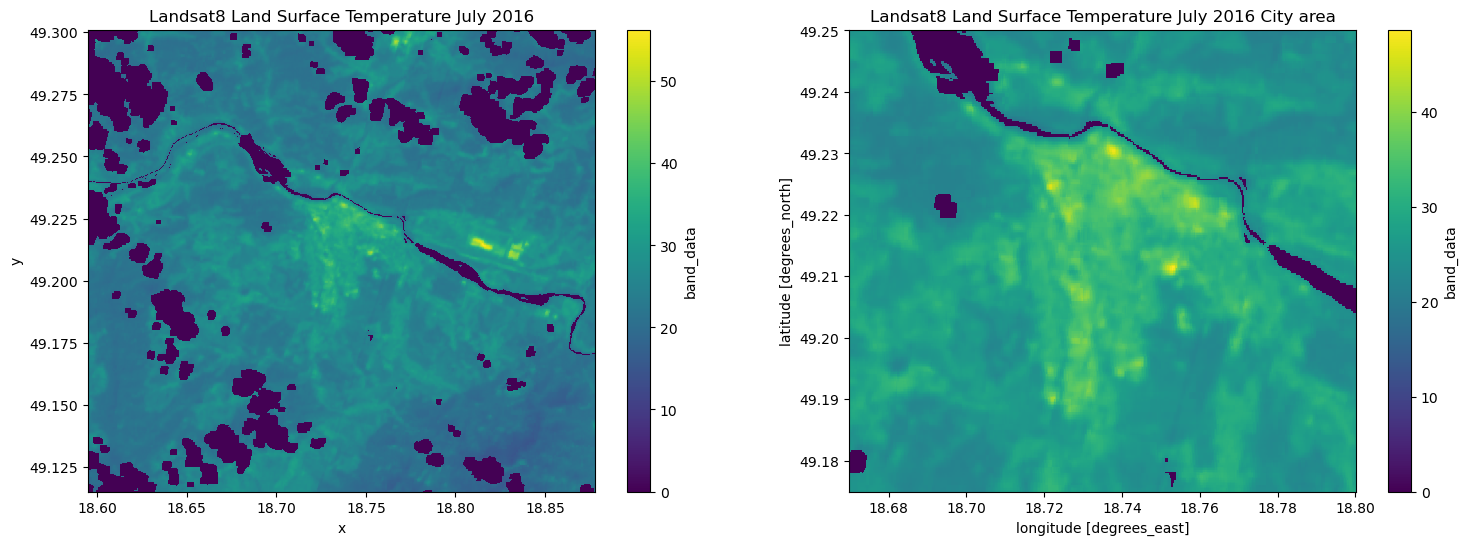

In [96]:
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
LS.plot(ax=axes[0],)
axes[0].set_title('Landsat8 Land Surface Temperature July 2016')
LS_City.plot(ax=axes[1],)
axes[1].set_title('Landsat8 Land Surface Temperature July 2016 City area')
plt.draw()

### Sentinel 2, July 2016 spectral band  5 days composite

You can work with the Sentinel2 products (NDVI) which are precomputed and avilable in the [https://dataspace.copernicus.eu/browser/?zoom=13&lat=48.23799&lng=17.09335&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS&fromTime=2023-10-14T00%3A00%3A00.000Z&toTime=2023-10-14T23%3A59%3A59.999Z&layerId=3_NDVI&demSource3D=%22MAPZEN%22&cloudCoverage=30].

The NDVI is the Normalized Difference Vegetation Index is a simple, but effective index for quantifying green vegetation. It is a measure of the state of vegetation health based on how plants reflect light at certain wavelengths. The value range of the NDVI is -1 to 1. Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1to 0.1) generally correspond to barren areas of rock, sand, or snow. Low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1). More information about the NDVI you can find here [https://custom-scripts.sentinel-hub.com/sentinel-2/ndvi/] and here [https://eos.com/make-an-analysis/ndvi/]

If you dicide to download the Sentinel2 bands you can calculate the NDVI directly from bands 8 and 4.

Process od download step by step:
- On the provided website, Firslty, you need to create an account and login.
- Secondly, go to search, select the Sentinel2, L2A product
- Select the time range which you prefer (for the connection to heat-wave select months June, July, August)
- Select the cloud cover to 10% (your area shoulb without clouds)
- Zoom to your area and click on Search. 
- Select the image which you prefare and download.
- After the download you need to unzip the folder - open the folder - go to Granule - IMG_DATA - R10m - select BO4 and B08
- Or you can extract all bands from R10, R20, R60 and create a raster stack.

In [66]:
S2list = glob( "C:/Work/KAJO/CLIMAAX/GitHub/Downscale/Sentinel2/*.jp2")
#
with rasterio.open(S2list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(S2list))
#
with rasterio.open('C:/Work/KAJO/CLIMAAX/GitHub/Downscale/Sentinel2/raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(S2list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))
#
S2jul2016='C:/Work/KAJO/CLIMAAX/GitHub/Downscale/Sentinel2/raster_stack.tif'
S2jul16 = xr.open_dataset(S2jul2016)
S2=S2jul16['band_data']

In [67]:
B1=S2[0]
B2=S2[1]
B3=S2[2]
B4=S2[3]
B5=S2[4]
B6=S2[5]
B7=S2[6]
B8=S2[7]
B9=S2[8]
B10=S2[9]
B11=S2[10]
B12=S2[11]

In [68]:
NDVI=(B8-B4)/(B8+B4)
#NDVI.plot()
NDVI.rio.write_crs("epsg:32633", inplace=True)

<xarray.DataArray 'band_data' (y: 1830, x: 1830)>
array([[ 0.41843137,  0.3242519 ,  0.22710909, ...,  0.42290655,
         0.48683247,  0.48173517],
       [ 0.35447437,  0.34070307,  0.32236442, ...,  0.51062745,
         0.53695226,  0.38261464],
       [ 0.36077586,  0.3715131 ,  0.3184181 , ...,  0.55328   ,
         0.5532206 ,  0.48546028],
       ...,
       [-0.02291476,  0.15678255,  0.3959321 , ...,  0.32764   ,
         0.12697695,  0.12724742],
       [ 0.05472637,  0.32447088,  0.46300212, ...,  0.10618769,
         0.09891492,  0.10442165],
       [ 0.19147474,  0.33264604,  0.5048773 , ...,  0.09349786,
         0.09157626,  0.11987381]], dtype=float32)
Coordinates:
  * x            (x) float64 7e+05 7e+05 7.001e+05 ... 8.097e+05 8.097e+05
  * y            (y) float64 5.5e+06 5.5e+06 5.5e+06 ... 5.39e+06 5.39e+06
    spatial_ref  int32 0

In [69]:
S2_NDVI=NDVI.copy()

In [70]:
S2NDVI84=S2_NDVI.rio.reproject_match(LS)

In [97]:
## RECLASS
# NDVI 1 class -1.0 ~ 0.2 [1] Bare areas or rock, water, sand or snow, 
#               0.2 ~ 0.2 [2] Grass 
#               0.2 ~ 0.4 [3] Shrub and grassland
#               0.4 ~ 0.6 [4] Mixed Forest and Shrubs
#               0.6 ~ 0.8 [5] Forest
#               0.8 ~ 1.0 [6] Dense forest       
## JUNE
NDVI_bins=[-1,0, 0.2, 0.4, 0.6, 0.8, 1]
NDVI_values=[0, 1, 2, 3, 4, 5, 6]
S2NDVI84_class = reclassify(S2NDVI84, bins=NDVI_bins, new_values=NDVI_values)
S2_City=S2NDVI84_class.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)

C:\Anaconda\envs\cordex\Lib\site-packages\rioxarray\raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


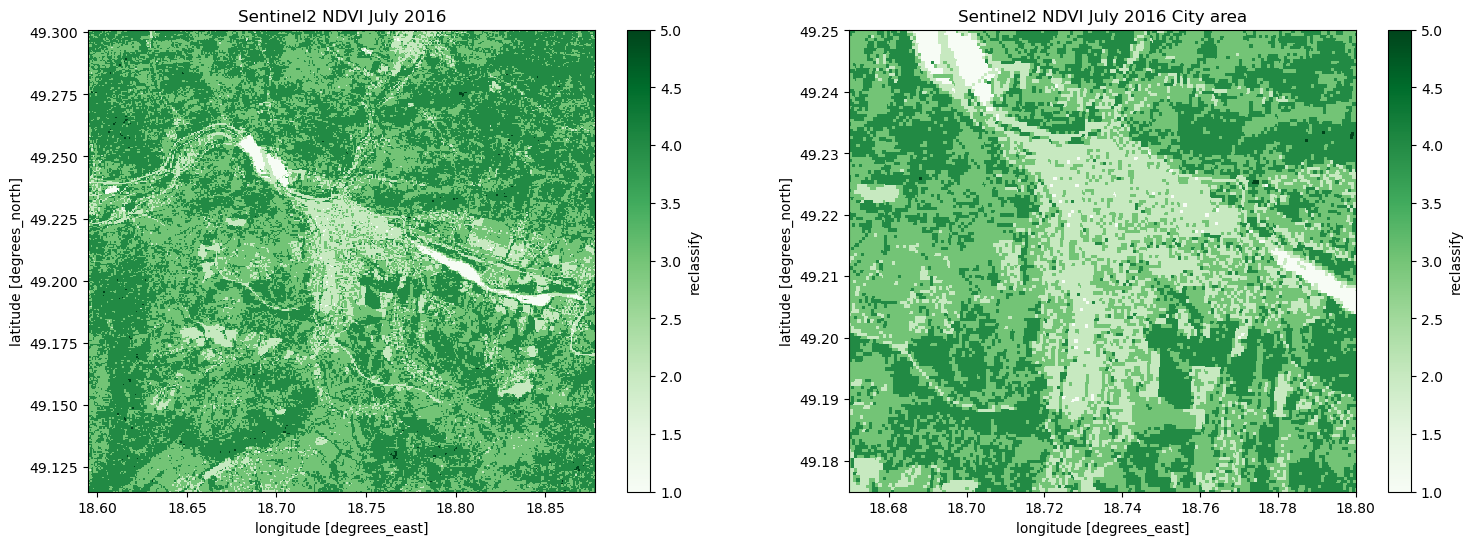

In [98]:
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
S2NDVI84_class.plot(ax=axes[0], cmap='Greens')
axes[0].set_title('Sentinel2 NDVI July 2016')
S2_City.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Sentinel2 NDVI July 2016 City area')
plt.draw()

# 5. Exposure and vulnerability of the population 


We can use the maps of the distribution of the population across the interested area and look if the most populated areas overlay with the most overheated parts. We can check the distance between the overheated areas and Hospitals or freshwater (fountains, drinking water stations) 

For the Zilina pilot, we collected data from the Zilina municipality office about the buildings that are usually crowded with huge masses of people, e.g. hospitals, stadiums, main squares, big shopping centres, main roads, and bigger factories...  

If places like these are overheated, a huge number of people can be negatively influenced by the Heat. With that, the risk probability also rises, and thus, these areas are prioritized for the Heat mitigation measures.  

In [84]:
ci='C:/Work/KAJO/CLIMAAX/Zilina/Zilina_Data/ci_features_ZA/ci_features_ZA.shp'
CI=gpd.read_file(ci)

In [85]:
CI

,class,label,relation,capacity,Note,ID_num,geometry
0,sport,Futbalové ihrisko Bytčica,no,0,NaN,1,"POLYGON ((-443791.900 -1176223.690, -443725.72..."
1,sport,Zimný štadión,yes,5500,"údávané rôzne kapacity, max 6200",2,"POLYGON ((-442944.823 -1171479.266, -442944.54..."
2,sport,Mestská krytá plaváreň a kúpalisko,yes,3000,kapacita je pre celý areál,3,"POLYGON ((-442605.270 -1173354.650, -442602.57..."
3,social,Denné centrum – Nám. J. Borodáča 1,yes,0,NaN,4,"POLYGON ((-441750.800 -1173434.590, -441738.31..."
4,social,"Denný stacionár, Námestie J. Borodáča 1",yes,0,NaN,5,"POLYGON ((-441730.410 -1173442.360, -441720.21..."
...,...,...,...,...,...,...,...
217,sport,Bežecká dráha Bôrická cesta,no,0,NaN,221,"POLYGON ((-443190.610 -1174360.630, -443143.59..."
218,education,"Súkromná škola umeleckého priemyslu, Hálkova, ...",no,0,NaN,222,"POLYGON ((-443770.798 -1172424.961, -443770.65..."
219,health,"MONERE s.r.o. Výdajňa zdravotníckych pomôcok, ...",no,0,NaN,223,"POLYGON ((-442807.238 -1172005.861, -442811.73..."
220,sport,Futbalové ihrisko Vranie,no,0,NaN,224,"POLYGON ((-442437.440 -1168488.120, -442529.92..."


In [86]:
CI_WGS=CI.to_crs(epsg=4326)

<Axes: title={'center': 'Chelsa july 2016 max daily air T 100m'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

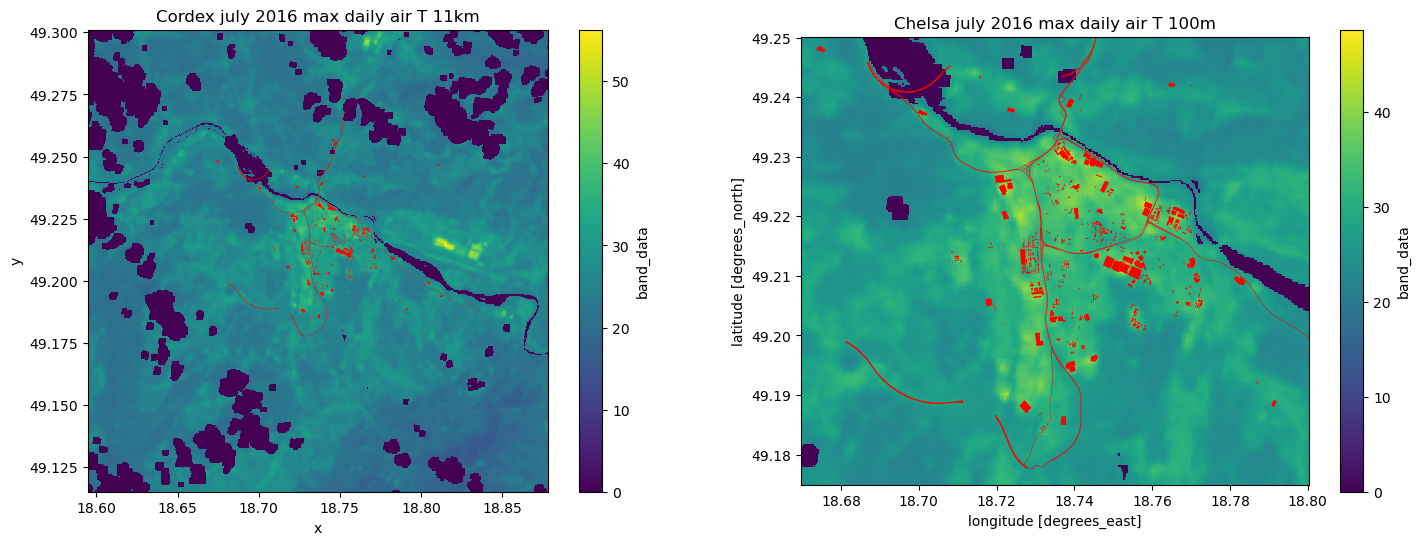

In [99]:
# Plot Cordex, Chelsa, Landsat
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
LS.plot(ax=axes[0])
axes[0].set_title('Cordex july 2016 max daily air T 11km')
CI_WGS.plot(ax=axes[0], color='red') ### it will be best to plot it hollow 
LS_City.plot(ax=axes[1])
axes[1].set_title('Chelsa july 2016 max daily air T 100m')
CI_WGS.plot(ax=axes[1], color='red')

<Axes: title={'center': 'Chelsa july 2016 max daily air T 100m'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

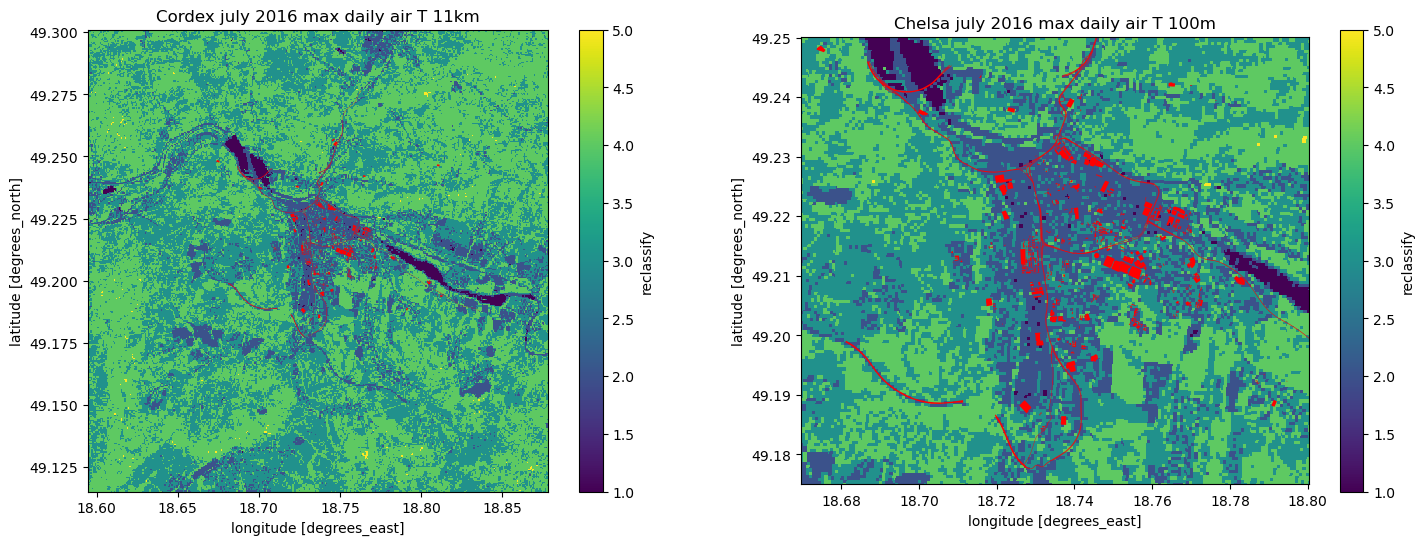

In [100]:
# Plot Cordex, Chelsa, Landsat
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
S2NDVI84_class.plot(ax=axes[0])
axes[0].set_title('Cordex july 2016 max daily air T 11km')
CI_WGS.plot(ax=axes[0], color='red') ### it will be best to plot it hollow 
S2_City.plot(ax=axes[1])
axes[1].set_title('Chelsa july 2016 max daily air T 100m')
CI_WGS.plot(ax=axes[1], color='red')